In [1]:
import glob
import numpy as np
import os

In [2]:
idx_train = glob.glob("./dataset/selfie/training/*.png")
idx_test = glob.glob("./dataset/selfie/testing/*.png")

In [3]:
partition = {}

train_path = "./dataset/selfie/training/"
test_path  = "./dataset/selfie/testing/"

IDs = []

for train_i in idx_train:
    train_ID = train_i.split("/")[-1]
    if 'matte' not in train_ID:
        IDs.append(os.path.join(train_path, train_ID))

for test_i in idx_test:
    test_ID = test_i.split("/")[-1]
    if 'matte' not in test_ID:
        IDs.append(os.path.join(test_path, test_ID))

IDs.sort()

In [4]:
# add supervisely dataset

In [5]:
len(IDs)

2000

In [6]:
IDs

['./dataset/selfie/testing/00001.png',
 './dataset/selfie/testing/00002.png',
 './dataset/selfie/testing/00003.png',
 './dataset/selfie/testing/00004.png',
 './dataset/selfie/testing/00005.png',
 './dataset/selfie/testing/00006.png',
 './dataset/selfie/testing/00007.png',
 './dataset/selfie/testing/00008.png',
 './dataset/selfie/testing/00009.png',
 './dataset/selfie/testing/00010.png',
 './dataset/selfie/testing/00011.png',
 './dataset/selfie/testing/00012.png',
 './dataset/selfie/testing/00013.png',
 './dataset/selfie/testing/00014.png',
 './dataset/selfie/testing/00015.png',
 './dataset/selfie/testing/00016.png',
 './dataset/selfie/testing/00017.png',
 './dataset/selfie/testing/00018.png',
 './dataset/selfie/testing/00019.png',
 './dataset/selfie/testing/00020.png',
 './dataset/selfie/testing/00021.png',
 './dataset/selfie/testing/00022.png',
 './dataset/selfie/testing/00023.png',
 './dataset/selfie/testing/00024.png',
 './dataset/selfie/testing/00025.png',
 './dataset/selfie/testin

In [7]:
import os 
import glob
import cv2
import json
import matplotlib.pyplot as plt
import numpy as np 

dataset_path = "./dataset/Supervisely_person_dataset/"

In [8]:
os.listdir(dataset_path)

['.DS_Store',
 'ds6',
 'ds1',
 'ds8',
 'ds10',
 'ds11',
 'ds9',
 'ds7',
 'Readme.md',
 '.ipynb_checkpoints',
 'ds2',
 'ds5',
 'ds13',
 'ds12',
 'ds4',
 'ds3']

In [9]:
ds_list = sorted([os.path.join(dataset_path, p) for p in os.listdir(dataset_path) if "." not in p])

In [13]:
mask_machine_list = []

for ds in ds_list:
    mask_machine_list += [os.path.join(ds, "masks_machine", p) for p in os.listdir(os.path.join(ds, 'masks_machine'))]
    

In [14]:
mask_machine_list

['./dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-541523_matte.png',
 './dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-395196_matte.png',
 './dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-588561_matte.png',
 './dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-220455_matte.png',
 './dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-58021_matte.png',
 './dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-347135_matte.png',
 './dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-247287_matte.png',
 './dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-428340_matte.png',
 './dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-416405_matte.png',
 './dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-247199_matte.png',
 './dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-543368_matte.png',
 './dataset/Supervisel

In [15]:
for a in mask_machine_list:
    if 'ds7' in a:
        print(a)

./dataset/Supervisely_person_dataset/ds7/masks_machine/pexels-photo-853169_matte.png
./dataset/Supervisely_person_dataset/ds7/masks_machine/pexels-photo-450278_matte.png
./dataset/Supervisely_person_dataset/ds7/masks_machine/pexels-photo-698173_matte.png
./dataset/Supervisely_person_dataset/ds7/masks_machine/pexels-photo-844912_matte.png
./dataset/Supervisely_person_dataset/ds7/masks_machine/pexels-photo-346844_matte.png
./dataset/Supervisely_person_dataset/ds7/masks_machine/pexels-photo-167381_matte.png
./dataset/Supervisely_person_dataset/ds7/masks_machine/pexels-photo-627766_matte.png
./dataset/Supervisely_person_dataset/ds7/masks_machine/lacrosse-player-stick-ball-159488_matte.png
./dataset/Supervisely_person_dataset/ds7/masks_machine/pexels-photo-722654_matte.png
./dataset/Supervisely_person_dataset/ds7/masks_machine/pexels-photo-850274_matte.png
./dataset/Supervisely_person_dataset/ds7/masks_machine/pexels-photo-38462_matte.png
./dataset/Supervisely_person_dataset/ds7/masks_machi

In [18]:
for ds in ds_list:

    IDs += [os.path.join(ds, "img", p) for p in os.listdir(os.path.join(ds, "img"))]

In [25]:
# check exist image 

names = []
for ID in IDs:
    
    empty = 0 
    
    ID = ID.split(".p")[0] + '_matte.png'
    ID = ID.replace("/img/", "/masks_machine/")
    ID = ID.replace(".jpeg", "")
    
    try :
        img = cv2.imread(ID, cv2.IMREAD_COLOR)

        mask = np.fliplr(np.expand_dims(img, axis=-1))
        
    except : 
        names.append(ID)
        empty += 1
    

In [27]:
names

[]

In [41]:
len(IDs)

7711

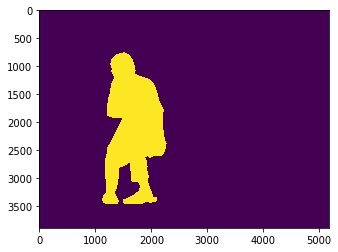

In [92]:
img = './dataset/Supervisely_person_dataset/ds7/masks_machine/pexels-photo-680591_matte.png'
plt.imshow(cv2.imread(img, cv2.IMREAD_GRAYSCALE) / 1.)

In [51]:
broken = []
for ID in IDs:
#     if len(ID.split(".")) == 3:
        
#         broken.append(ID)
    if 'jpeg' in ID:
        broken.append(ID)

In [54]:
broken

['./dataset/Supervisely_person_dataset/ds6/img/pexels-photo-547593.jpeg',
 './dataset/Supervisely_person_dataset/ds6/img/pexels-photo-395245.jpeg',
 './dataset/Supervisely_person_dataset/ds6/img/pexels-photo-106258.jpeg',
 './dataset/Supervisely_person_dataset/ds6/img/pexels-photo-279645.jpeg',
 './dataset/Supervisely_person_dataset/ds6/img/pexels-photo-795997.jpeg',
 './dataset/Supervisely_person_dataset/ds6/img/pexels-photo-355018.jpeg',
 './dataset/Supervisely_person_dataset/ds6/img/pexels-photo-341372.jpeg',
 './dataset/Supervisely_person_dataset/ds6/img/pexels-photo-168328.jpeg',
 './dataset/Supervisely_person_dataset/ds6/img/girl-beautiful-young-face-53000.jpeg',
 './dataset/Supervisely_person_dataset/ds6/img/pexels-photo-219681.jpeg',
 './dataset/Supervisely_person_dataset/ds6/img/pexels-photo-240744.jpeg',
 './dataset/Supervisely_person_dataset/ds6/img/pexels-photo-819469_lL85Tm7Hga.jpeg',
 './dataset/Supervisely_person_dataset/ds6/img/pexels-photo-597326.jpeg',
 './dataset/Sup

안 읽어지는 파일 없음

In [19]:
len(IDs)

7711

In [ ]:
# # save
# np.save("./dataset/img_paths.npy", IDs)

# img_paths = np.load("./dataset/img_paths.npy")

In [20]:
# save with supervisely dataset
np.save("./dataset/img_paths_with_supervisely.npy", IDs)

img_paths = np.load("./dataset/img_paths_with_supervisely.npy")

In [23]:
img_paths

array(['./dataset/selfie/testing/00001.png',
       './dataset/selfie/testing/00002.png',
       './dataset/selfie/testing/00003.png', ...,
       './dataset/Supervisely_person_dataset/ds9/img/pexels-photo-859191.png',
       './dataset/Supervisely_person_dataset/ds9/img/pexels-photo-808862.png',
       './dataset/Supervisely_person_dataset/ds9/img/pexels-photo-879651.png'],
      dtype='<U135')

In [89]:
sr = "./dataset/Supervisely_person_dataset/ds9/img/pexels-photo-879651.png"

In [90]:
sr = sr.split(".p")[0] + "_matte.png"
sr = sr.replace("jpeg", "/masks_machine/")

In [91]:
sr

'./dataset/Supervisely_person_dataset/ds9/img/pexels-photo-879651_matte.png'

In [10]:
import cv2
import matplotlib.pyplot as plt

In [15]:
img = cv2.imread("../dataset/Custom/img/IMG_3673.jpg", cv2.IMREAD_COLOR)
mask = cv2.imread("../dataset/Custom/mask/IMG_3673.jpg", cv2.IMREAD_GRAYSCALE)

In [16]:
mask.shape

(1305, 1570)

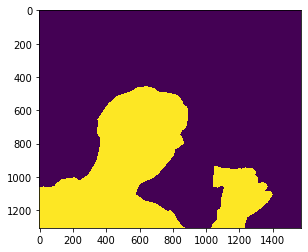

In [17]:
plt.imshow(mask)